In [4]:
pip install numpy pandas tensorflow scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
dataset = pd.read_csv(r"C:\Users\user\Downloads\synthetic_biosensor_dataset fro major project.csv")

# Features and labels
X = dataset[['HER2_level', 'Frequency_shift', 'Impedance']].values
y = dataset['Label'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for CNN input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simpler model with only Dense layers
model = Sequential()

# Input layer
model.add(Dense(64, input_shape=(3,), activation='relu'))  # input_shape=(3,) as we have 3 features

# Add some hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  # sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
'''X = dataset[['HER2_level', 'Frequency_shift', 'Impedance']].values  # Shape: (samples, features)
y = dataset['Label'].values


In [24]:
'''print("Shape of X before reshaping:", X.shape)


Shape of X before reshaping: (1000, 3)


In [25]:
'''X = X.reshape(X.shape[0], 1, X.shape[1])  # Shape: (samples=1000, timesteps=1, features=3)


In [26]:
'''X = X.reshape(X.shape[0], 3, 1)'''

In [29]:
'''from keras.layers import Reshape

model = Sequential([
    Reshape((1, 3), input_shape=(3,)),  # Explicit reshape to (timesteps=1, features=3)
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=1),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
'''

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/50


20/20 [==============================] - 4s 40ms/step - loss: 0.5634 - accuracy: 0.8484 - val_loss: 0.4504 - val_accuracy: 0.9187
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 0.3739 - accuracy: 0.9156 - val_loss: 0.2901 - val_accuracy: 0.9187
Epoch 3/50
20/20 [==============================] - 0s 11ms/step - loss: 0.2639 - accuracy: 0.9172 - val_loss: 0.2332 - val_accuracy: 0.9125
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 0.2255 - accuracy: 0.9234 - val_loss: 0.2204 - val_accuracy: 0.9125
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.2078 - accuracy: 0.9219 - val_loss: 0.2211 - val_accuracy: 0.9187
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.2014 - accuracy: 0.9187 - val_loss: 0.2205 - val_accuracy: 0.9125
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 0.1989 - accuracy: 0.9187 - val_loss: 0.2221 - val_accuracy: 0.9125
Epoch 8/50
20/

In [8]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)


7/7 [==============================] - 0s 6ms/step - loss: 0.3142 - accuracy: 0.8850
Test Accuracy: 0.88
7/7 [==============================] - 0s 4ms/step


Accuracy: 0.89
Precision: 0.98
Recall: 0.80
F1 Score: 0.88


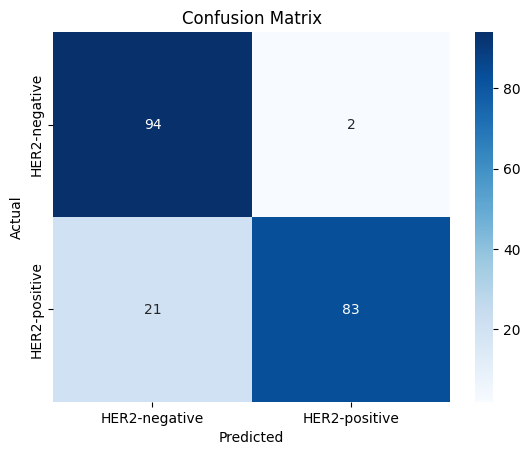

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HER2-negative', 'HER2-positive'],
            yticklabels=['HER2-negative', 'HER2-positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


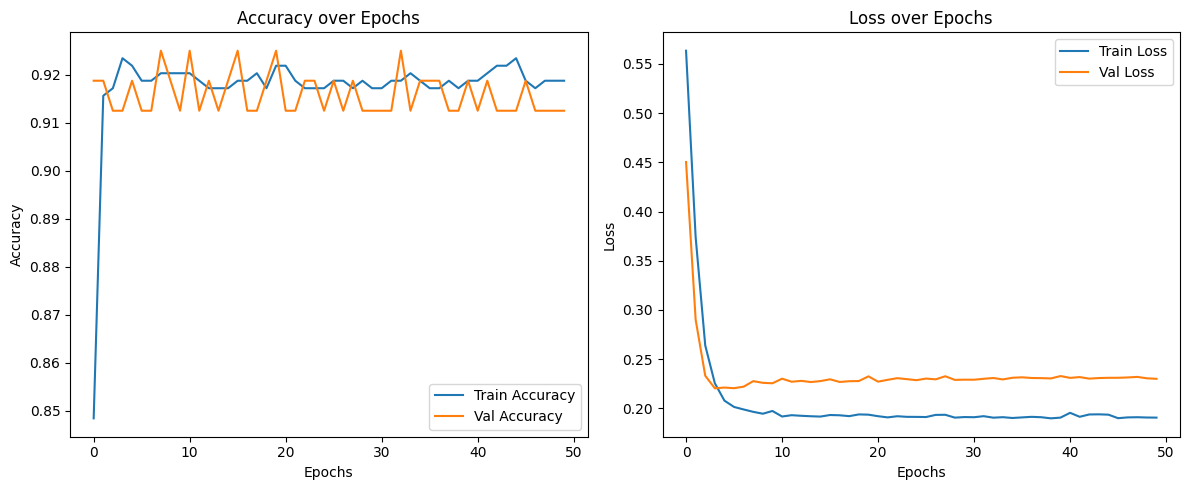

In [12]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
model.save('breast_cancer_biosensor_cnn.h5')


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
pip install --upgrade tensorflow


  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.7 MB 1.4 MB/s eta 0:04:28
   ---------------------------------------- 0.8/375.7 MB 1.4 MB/s eta 0:04:29
   ---------------------------------------- 1.3/375.7 MB 1.6 MB/s eta 0:03:55
   ---------------------------------------- 1.6/375.7 MB 1.7 MB/s eta 0:03:43
   ---------------------------------------- 1.6/375.7 MB 1.7 MB/s eta 0:03:43
   ---------------------------------------- 1.6/375.7 MB 1.7 MB/s eta 0:03:43
   ---------------------------------------- 1.6/375.7 MB 1.7 MB/s eta 0:03:43
   ---------------------------------------- 2.1/375.7 MB 1.1 MB/s eta 0:05:50
   ---------------------------------------- 2.6/375.7 MB 1.2 MB/s eta 0:05:09
   ----------------------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else 

In [19]:
import numpy as np
import tensorflow as tf

# New patient data (3 features)
new_patient_data = np.array([1.5, 0.4, 1.2])  # Example values

# Ensure the shape is (1, 3) as required by the model
print("Shape of new_patient_data before reshaping:", new_patient_data.shape)

# Reshaping the data to match the model input: (batch_size, features)
# The model expects (None, 3), so we reshape to (1, 3)
new_patient_data = np.expand_dims(new_patient_data, axis=0)

print("Shape of new_patient_data after expanding dimensions:", new_patient_data.shape)

# Convert the reshaped data to a TensorFlow tensor
new_patient_data = tf.convert_to_tensor(new_patient_data, dtype=tf.float32)

print("Shape of new_patient_data (as tensor):", new_patient_data.shape)

# Model's input shape (for comparison)
print("Model's expected input shape:", model.input_shape)

# Try making a prediction
try:
    prediction = model.predict(new_patient_data)
    print("Prediction result (probability):", prediction)

    # Convert prediction to binary classification (0 = no cancer, 1 = cancer)
    predicted_class = (prediction > 0.5).astype(int)
    print("Predicted class (0 = no cancer, 1 = cancer):", predicted_class)

except Exception as e:
    print(f"Error during prediction: {e}")


Shape of new_patient_data before reshaping: (3,)
Shape of new_patient_data after expanding dimensions: (1, 3)
Shape of new_patient_data (as tensor): (1, 3)
Model's expected input shape: (None, 3)
1/1 [==============================] - 0s 85ms/step
Prediction result (probability): [[0.9999337]]
Predicted class (0 = no cancer, 1 = cancer): [[1]]


In [20]:
import tensorflow as tf
print(tf.__version__)


2.15.1


In [18]:
'''import tensorflow as tf
import numpy as np

# Simple test model with the same input shape (3 features)
simple_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)),  # Expecting input shape (3,)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output as a binary class (cancer/no cancer)
])

# Compile the model
simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create dummy data to fit the model (100 samples, 3 features)
dummy_X = np.random.rand(100, 3)
dummy_y = np.random.randint(2, size=100)

# Fit the model with dummy data for testing
simple_model.fit(dummy_X, dummy_y, epochs=2)

# Test with a new patient (1 sample with 3 features)
new_patient_data = np.array([1.5, 0.4, 1.2]).reshape(1, 3)  # Shape should be (1, 3)

# Prediction
prediction = simple_model.predict(new_patient_data)
print("Prediction result (probability):", prediction)
predicted_class = (prediction > 0.5).astype(int)
print("Predicted class (0 = no cancer, 1 = cancer):", predicted_class)


SyntaxError: EOF while scanning triple-quoted string literal (4223746816.py, line 27)

In [21]:
import numpy as np

# Example patient data
new_patient_data = np.array([1.5, 0.4, 1.2], dtype=np.float32)  # Shape: (3,)
print(f"Shape before reshape: {new_patient_data.shape}")

# Reshaping it to (1, 3) to match the model input shape
new_patient_data = new_patient_data.reshape(1, 3)
print(f"Shape after reshape: {new_patient_data.shape}")


Shape before reshape: (3,)
Shape after reshape: (1, 3)


In [22]:
# Check the input shape of the model
print(f"Model's input shape: {model.input_shape}")


Model's input shape: (None, 3)


In [23]:
import numpy as np
import tensorflow as tf

# Assuming the model is already defined and compiled.

# New patient data (example input)
new_patient_data = np.array([1.0, 2.0, 3.0], dtype=np.float32)  # Shape: (3,)

# Convert new patient data into a tensor
new_patient_data_tensor = tf.convert_to_tensor(new_patient_data)  # Shape: (3,)

# Expand dimensions explicitly to make it a batch of size 1, shape (1, 3)
new_patient_data_tensor = tf.expand_dims(new_patient_data_tensor, axis=0)  # Shape: (1, 3)

# Check the shape and dtype of the tensor to ensure compatibility
print("New patient data tensor shape:", new_patient_data_tensor.shape)
print("New patient data tensor dtype:", new_patient_data_tensor.dtype)

# Make sure the model's input layer matches the shape (None, 3)
print("Model input shape:", model.input.shape)

# Use .numpy() for prediction (works when model is in eager execution mode)
# This is to see if TensorFlow is struggling with tensor shapes.
try:
    prediction = model.predict(new_patient_data_tensor.numpy())  # Convert tensor to numpy array
    print("Prediction result (probability):", prediction)
    predicted_class = (prediction > 0.5).astype(int)  # Thresholding for binary classification
    print("Predicted class (0 = no cancer, 1 = cancer):", predicted_class)
except Exception as e:
    print(f"Error during prediction: {e}")


New patient data tensor shape: (1, 3)
New patient data tensor dtype: <dtype: 'float32'>
Model input shape: (None, 3)
1/1 [==============================] - 0s 186ms/step
Prediction result (probability): [[0.9999855]]
Predicted class (0 = no cancer, 1 = cancer): [[1]]


In [24]:
import numpy as np
import tensorflow as tf

# Example of a simple model for demonstration (feel free to replace with your model)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model (this is necessary for prediction)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# New patient data (example input)
new_patient_data = np.array([1.0, 2.0, 3.0], dtype=np.float32)  # Shape: (3,)

# Convert new patient data into a tensor and ensure batch size
new_patient_data_tensor = tf.convert_to_tensor(new_patient_data)  # Shape: (3,)
new_patient_data_tensor = tf.expand_dims(new_patient_data_tensor, axis=0)  # Shape: (1, 3)

# Ensure the data tensor shape is correct
print("New patient data tensor shape:", new_patient_data_tensor.shape)
print("New patient data tensor dtype:", new_patient_data_tensor.dtype)

# Run a simple forward pass to ensure the model is properly initialized
try:
    model(new_patient_data_tensor)  # Initialize the model with the data
    print("Model has been successfully called.")
except Exception as e:
    print(f"Error during forward pass: {e}")

# Now predict using the model
try:
    prediction = model.predict(new_patient_data_tensor)
    print("Prediction result (probability):", prediction)
    predicted_class = (prediction > 0.5).astype(int)  # Thresholding for binary classification
    print("Predicted class (0 = no cancer, 1 = cancer):", predicted_class)
except Exception as e:
    print(f"Error during prediction: {e}")


New patient data tensor shape: (1, 3)
New patient data tensor dtype: <dtype: 'float32'>
Model has been successfully called.
1/1 [==============================] - 0s 151ms/step
Prediction result (probability): [[0.5771897]]
Predicted class (0 = no cancer, 1 = cancer): [[1]]


In [25]:
'''# Inspect the model summary
model.summary()



SyntaxError: EOF while scanning triple-quoted string literal (2075339776.py, line 3)

In [28]:
tf.get_logger().setLevel('DEBUG')


In [27]:
'''# Assuming you already have your trained model (replace 'model' with your model)
new_patient_data = np.array([1.5, 0.4, 1.2]).reshape(1, 3)  # Shape should be (1, 3)

# Convert to tensor (if needed)
new_patient_data = tf.convert_to_tensor(new_patient_data, dtype=tf.float32)

# Predict
try:
    prediction = model.predict(new_patient_data)
    print("Prediction result (probability):", prediction)
    predicted_class = (prediction > 0.5).astype(int)
    print("Predicted class (0 = no cancer, 1 = cancer):", predicted_class)
except Exception as e:
    print(f"Error during prediction: {e}")


SyntaxError: EOF while scanning triple-quoted string literal (650821220.py, line 14)